## Observations and Insights 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice.
count_ID = merge_df["Mouse ID"].unique()
len(count_ID)

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df['unique_id'] = merge_df['Mouse ID'].astype(str) + '_' + merge_df['Timepoint'].astype(str)
count = merge_df["unique_id"].value_counts()

# If there are any values that show up more than once they are duplicates
count.head(10)

g989_0     2
g989_5     2
g989_15    2
g989_10    2
g989_20    2
o331_20    1
o523_10    1
k483_35    1
l661_25    1
j984_10    1
Name: unique_id, dtype: int64

In [67]:
# Mouse ID "g989" has duplicates and needs to be removed from the data.

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
DupMouse_df = merge_df.loc[merge_df["Mouse ID"] == "g989",:]
DupMouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,unique_id
908,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989_5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989_5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989_10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989_10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989_15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989_15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989_20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
allColumns = merge_df.columns
CleanedMouse_df = merge_df.loc[merge_df["Mouse ID"] != "g989", allColumns]
CleanedMouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,unique_id
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969_25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969_30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969_35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969_40


In [70]:
#Checking that there are no longer duplicates
cleancount = CleanedMouse_df["unique_id"].value_counts()
cleancount.head(10)

m546_30    1
l661_25    1
u149_15    1
o331_15    1
t565_10    1
j296_10    1
r554_0     1
a262_20    1
e662_25    1
t198_5     1
Name: unique_id, dtype: int64

In [71]:
# Checking the number of mice in the clean DataFrame.
cleancount_ID = CleanedMouse_df["Mouse ID"].unique()
len(cleancount_ID)

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#DataFrames for each drug regimen
Ramicane_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Ramicane", :]
Capomulin_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Capomulin", :]
Infubinol_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Infubinol", :]
Placebo_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Placebo", :]
Ceftamin_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Ceftamin", :]
Stelasyn_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Stelasyn", :]
Zoniferol_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Zoniferol", :]
Ketapril_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Ketapril", :]
Propriva_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Propriva", :]
Naftisol_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Naftisol", :]

#Summary Stats
Stats = CleanedMouse_df.groupby("Drug Regimen").agg(['mean', 'median','var','std','sem'])
Tumor_df = Stats.loc[:,"Tumor Volume (mm3)"]
Tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

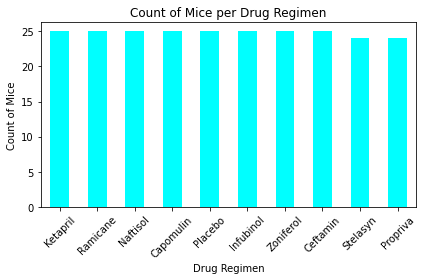

In [74]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Unique Counts
uniqueMice_df = CleanedMouse_df.drop_duplicates(subset="Mouse ID", keep="first")
drugRegimenList_df = uniqueMice_df["Drug Regimen"].value_counts()

#pdMouseCountBar = cleaned_df.plot(x=drugRegimenList y="Drug Regimen" )
drugRegimenList_df.plot(kind="bar", facecolor="cyan",title="Count of Mice per Drug Regimen", rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
drugRegimenList_df
plt.tight_layout()

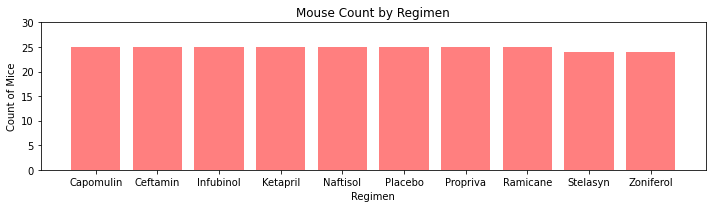

In [75]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = Tumor_df.index

plt.figure(figsize=(10,3))
plt.bar(x = x_axis, height = drugRegimenList_df, color = 'r', alpha=0.5, align="center")

plt.title("Mouse Count by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Count of Mice")
plt.ylim(0,30)
plt.tight_layout()


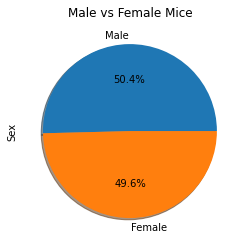

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGender = uniqueMice_df["Sex"].value_counts()
mouseGender.plot(kind="pie", title = "Male vs Female Mice", autopct="%1.1f%%", shadow = True)

Text(0, 0.5, 'Sex')

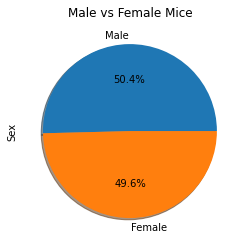

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouseGender = uniqueMice_df["Sex"].value_counts()
plt.pie(mouseGender, labels= ["Male", "Female"], shadow = True, autopct="%1.1f%%")
plt.title("Male vs Female Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
combined_df = CleanedMouse_df.loc[(CleanedMouse_df["Drug Regimen"] == "Ramicane") | (CleanedMouse_df["Drug Regimen"] == "Capomulin") | (CleanedMouse_df["Drug Regimen"] == "Infubinol") | (CleanedMouse_df["Drug Regimen"] == "Ceftamin")]
scombined_df = combined_df.loc[:,(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)","Timepoint", "unique_id"])]

Clean = scombined_df.sort_values(by='Timepoint', ascending=False)
Clean.drop_duplicates(subset="Mouse ID", keep="first")
Cleaner = Clean.sort_values(by='Drug Regimen', ascending=False)
Cleaner

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,unique_id
0,k403,Ramicane,45.000000,0,k403_0
324,a411,Ramicane,39.130737,30,a411_30
413,q597,Ramicane,42.537986,10,q597_10
285,c458,Ramicane,44.454378,10,c458_10
403,u196,Ramicane,46.422943,10,u196_10
...,...,...,...,...,...
311,j246,Capomulin,45.641438,5,j246_5
126,r554,Capomulin,45.781746,5,r554_5
308,b128,Capomulin,38.379726,40,b128_40
21,x401,Capomulin,45.473753,5,x401_5


In [79]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

RegimentList = Cleaner["Drug Regimen"]
TumorSize = Cleaner["Tumor Volume (mm3)"]

Ramicane_df = Cleaner.loc[Cleaner["Drug Regimen"] == "Ramicane", :]
Capomulin_df = Cleaner.loc[Cleaner["Drug Regimen"] == "Capomulin", :]
Infubinol_df = Cleaner.loc[Cleaner["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Cleaner.loc[Cleaner["Drug Regimen"] == "Ceftamin", :]

RamicaneTumor = Ramicane_df["Tumor Volume (mm3)"]
CapomulinTumor = Capomulin_df["Tumor Volume (mm3)"]
InfubinolTumor = Infubinol_df["Tumor Volume (mm3)"]
CeftaminTumor = Ceftamin_df["Tumor Volume (mm3)"]
    
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Ramicane
Ramicanequartiles = RamicaneTumor.quantile([.25,.5,.75])
Ramicanelowerq = Ramicanequartiles[0.25]
Ramicaneupperq = Ramicanequartiles[0.75]
Ramicaneiqr = Ramicaneupperq-Ramicanelowerq
Ramicanelower_bound = Ramicanelowerq - (1.5*Ramicaneiqr)
Ramicaneupper_bound = Ramicaneupperq + (1.5*Ramicaneiqr)
print("")
print("Ramicane Stats")
print(f"The lower quartile of tumor volume using Ramicane is: {Ramicanelowerq}")
print(f"The upper quartile of tumor volume using Ramicane is: {Ramicaneupperq}")
print(f"The interquartile range of tumor volume using Ramicane is: {Ramicaneiqr}")
print(f"The the median of tumor volume using Ramicane is: {Ramicanequartiles[0.5]} ")
print(f"Values below {Ramicanelower_bound} could be outliers.")
print(f"Values above {Ramicaneupper_bound} could be outliers.")

#Capomulin
Capomulinquartiles = CapomulinTumor.quantile([.25,.5,.75])
Capomulinlowerq = Capomulinquartiles[0.25]
Capomulinupperq = Capomulinquartiles[0.75]
Capomuliniqr = Capomulinupperq-Capomulinlowerq
Capomulinlower_bound = Capomulinlowerq - (1.5*Capomuliniqr)
Capomulinupper_bound = Capomulinupperq + (1.5*Capomuliniqr)
print("")
print("Capomulin Stats")
print(f"The lower quartile of tumor volume using Capomuli is: {Capomulinlowerq}")
print(f"The upper quartile of tumor volume using Capomuli is: {Capomulinupperq}")
print(f"The interquartile range of tumor volume using Capomuli is: {Capomuliniqr}")
print(f"The the median of tumor volume using Capomuli is: {Capomulinquartiles[0.5]} ")
print(f"Values below {Capomulinlower_bound} could be outliers.")
print(f"Values above {Capomulinupper_bound} could be outliers.")

#Infubinol
Infubinolquartiles = InfubinolTumor.quantile([.25,.5,.75])
Infubinollowerq = Infubinolquartiles[0.25]
Infubinolupperq = Infubinolquartiles[0.75]
Infubinoliqr = Infubinolupperq-Infubinollowerq
Infubinollower_bound = Infubinollowerq - (1.5*Infubinoliqr)
Infubinolupper_bound = Infubinolupperq + (1.5*Infubinoliqr)
print("")
print("Infubinol Stats")
print(f"The lower quartile of tumor volume using Infubinol is: {Infubinollowerq}")
print(f"The upper quartile of tumor volume using Infubinol is: {Infubinolupperq}")
print(f"The interquartile range of tumor volume using Infubinol is: {Infubinoliqr}")
print(f"The the median of tumor volume using Infubinol is: {Infubinolquartiles[0.5]} ")
print(f"Values below {Infubinollower_bound} could be outliers.")
print(f"Values above {Infubinolupper_bound} could be outliers.")

#Ceftamin
Ceftaminquartiles = CeftaminTumor.quantile([.25,.5,.75])
Ceftaminlowerq = Ceftaminquartiles[0.25]
Ceftaminupperq = Ceftaminquartiles[0.75]
Ceftaminiqr = Ceftaminupperq-Ceftaminlowerq
Ceftaminlower_bound = Ceftaminlowerq - (1.5*Ceftaminiqr)
Ceftaminupper_bound = Ceftaminupperq + (1.5*Ceftaminiqr)
print("")
print("Ceftamin Stats")
print(f"The lower quartile of tumor volume using Ceftamin is: {Ceftaminlowerq}")
print(f"The upper quartile of tumor volume using Ceftamin is: {Ceftaminupperq}")
print(f"The interquartile range of tumor volume using Ceftamin is: {Ceftaminiqr}")
print(f"The the median of tumor volume using Ceftamin is: {Ceftaminquartiles[0.5]} ")
print(f"Values below {Ceftaminlower_bound} could be outliers.")
print(f"Values above {Ceftaminupper_bound} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes

# Determine outliers using upper and lower bounds
    


Ramicane Stats
The lower quartile of tumor volume using Ramicane is: 36.67463458499999
The upper quartile of tumor volume using Ramicane is: 45.0
The interquartile range of tumor volume using Ramicane is: 8.325365415000007
The the median of tumor volume using Ramicane is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.

Capomulin Stats
The lower quartile of tumor volume using Capomuli is: 37.685932865
The upper quartile of tumor volume using Capomuli is: 45.0
The interquartile range of tumor volume using Capomuli is: 7.314067135000002
The the median of tumor volume using Capomuli is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.

Infubinol Stats
The lower quartile of tumor volume using Infubinol is: 47.3123533
The upper quartile of tumor volume using Infubinol is: 57.314443967500004
The interquartile range of tumor volume using Infubinol is: 10.002090

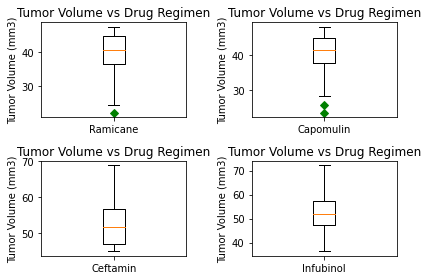

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots(2,2)


ax[0, 0].boxplot(RamicaneTumor,0,'gD')
ax[0, 1].boxplot(CapomulinTumor,0,'gD')
ax[1, 1].boxplot(InfubinolTumor,0,'gD')
ax[1, 0].boxplot(CeftaminTumor,0,'gD')

ax[0, 0].set_title("Tumor Volume vs Drug Regimen")
ax[0, 1].set_title("Tumor Volume vs Drug Regimen")
ax[1, 1].set_title("Tumor Volume vs Drug Regimen")
ax[1, 0].set_title("Tumor Volume vs Drug Regimen")

ax[0, 0].set_ylabel("Tumor Volume (mm3)")
ax[0, 1].set_ylabel("Tumor Volume (mm3)")
ax[1, 1].set_ylabel("Tumor Volume (mm3)")
ax[1, 0].set_ylabel("Tumor Volume (mm3)")

ax[0, 0].set_xticklabels(np.repeat("Ramicane", 2),rotation=0, fontsize=10)
ax[0, 1].set_xticklabels(np.repeat("Capomulin", 2),rotation=0, fontsize=10)
ax[1, 1].set_xticklabels(np.repeat("Infubinol", 2),rotation=0, fontsize=10)
ax[1, 0].set_xticklabels(np.repeat("Ceftamin", 2),rotation=0, fontsize=10)


plt.tight_layout()



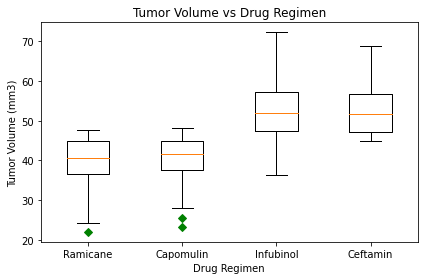

In [89]:
data = [RamicaneTumor, CapomulinTumor, InfubinolTumor, CeftaminTumor]
x_axis = np.arange(len(data))
labels = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

fig, ax = plt.subplots()
ax.boxplot(data,0,'gD')
plt.title("Tumor Volume vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
ax.set_xticklabels(np.repeat(labels, 1),rotation=0, fontsize=10)
plt.tight_layout()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

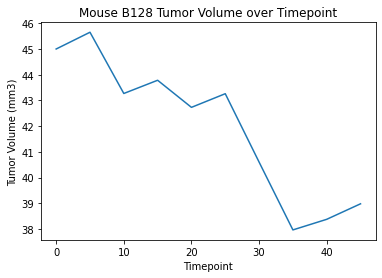

In [82]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseB128 = CleanedMouse_df.loc[CleanedMouse_df["Mouse ID"] == "b128", ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

plt.plot(mouseB128["Timepoint"], mouseB128["Tumor Volume (mm3)"])
plt.title("Mouse B128 Tumor Volume over Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

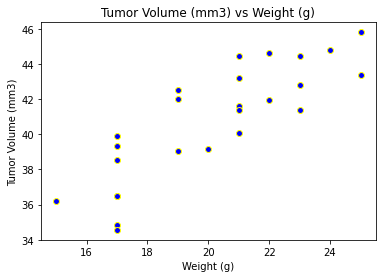

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = CleanedMouse_df.loc[CleanedMouse_df["Drug Regimen"] == "Capomulin", :]
Mice = Capomulin_df.drop_duplicates(subset="Mouse ID", keep="first").sort_values("Mouse ID")
ScatData = Capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": 'mean'}).sort_values("Mouse ID")

x_axis = Mice["Weight (g)"]
y_axis = ScatData
len(y_axis)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="yellow")
plt.title("Tumor Volume (mm3) vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [85]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis.iloc[:,0])
vc_fit = vc_slope * x_axis + vc_int

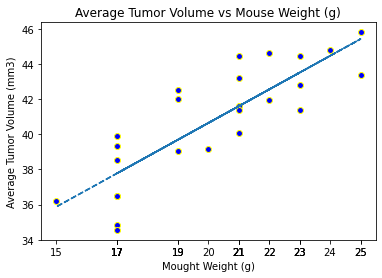

In [86]:
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="yellow")
plt.plot(x_axis,vc_fit,"--")
plt.xticks(x_axis)
plt.title("Average Tumor Volume vs Mouse Weight (g)")
plt.xlabel("Mought Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()